In [94]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
from holoviews.examples.gallery.apps.bokeh.crossfilter import columns
from xarray.util.generate_ops import inplace

df = pd.read_csv('Travel.csv')

df.head()


,Timestamp,Are you from Jaipur?,What is your age?,What is your gender?,What is your departure address (with pincode)?,What is your destination address? (with pincode),What is your mode of transportation?,"If Public Transport, Do you get seat availability easily?",If personal vehicles do you find a parking space easily?,How long do you wait for Public Transport?,...,What type of stoppage?,How many traffic lights do you have to pass during your travel journey ?,How many junctions during your travel journey?,How many road blocks during your travel journey?,Can you reach your destination on Time?,Can you reach your home on Time?,What is the weather condition before leaving home?,When did this journey take place?,When did you travel?,"Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc."
0,2024/12/31 9:56:27 am GMT+5:30,Yes,20-29,Male,"2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...","BISR, Statue Circle, C Scheme, Jaipur, Rajasth...",Public Transport,No,No,31-60 Minutes,...,Traffic Light,6,0,0,Yes,No,Sunny,Working Day,Weekday,Chaotic
1,2024/12/31 12:35:40 pm GMT+5:30,Yes,19 and below,Female,Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...,Birla Institute of Technology Jaipur Near Apex...,Cabs Services,NaN,NaN,NaN,...,Traffic Light,5,0,0,Yes,Yes,Cloudy,Working Day,Weekday,Mesmerized!
2,2024/12/31 12:54:10 pm GMT+5:30,Yes,19 and below,Male,"Swastik Villas, New Sanganer Road, Jaipur(302020)","Bit Jaipur, Malviya Nagar, Jaipur(302017)",Two Wheeler,No,Yes,31-60 Minutes,...,Traffic Light,4,5,2,Yes,No,Cloudy,Working Day,Weekday,Polluted
3,2024/12/31 2:49:46 pm GMT+5:30,Yes,19 and below,Male,305001,302017,Public Transport,Yes,Yes,0-30 Minutes,...,NaN,1,0,0,Yes,Yes,Sunny,Working Day,Weekday,NaN
4,2024/12/31 2:57:22 pm GMT+5:30,Yes,19 and below,Male,24/25 sagar apartments,Same,Two Wheeler,No,Yes,0-30 Minutes,...,Traffic Light,6,NaN,NaN,No,NaN,Sunny,NaN,NaN,NaN


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 29 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   Timestamp                                                                                                 924 non-null    object
 1   Are you from Jaipur?                                                                                      919 non-null    object
 2   What is your age?                                                                                         922 non-null    object
 3   What is your gender?                                                                                      919 non-null    object
 4   What is your departure address (with pincode)?                                        

In [96]:
def parse_timestamp(timestamp_str):
    try:
        # If we know the format is '%Y/%m/%d %I:%M:%S %p GMT%z', use it.
        return parser.parse(timestamp_str)
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT for unparsable values

df['Timestamp'] = df['Timestamp'].apply(parse_timestamp)
df['Travel_Date'] = df['Timestamp'].dt.date
df['Travel_Time'] = df['Timestamp'].dt.time
df.drop(columns=['Timestamp'], inplace=True)

print(df[['Travel_Date','Travel_Time']].head())
print(df.info())

  Travel_Date Travel_Time
0  2024-12-31    09:56:27
1  2024-12-31    12:35:40
2  2024-12-31    12:54:10
3  2024-12-31    14:49:46
4  2024-12-31    14:57:22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   Are you from Jaipur?                                                                                      919 non-null    object
 1   What is your age?                                                                                         922 non-null    object
 2   What is your gender?                                                                                      919 non-null    object
 3   What is your departure address (with pincode)?                  

In [97]:
df['What is your age?'] = df['What is your age?'].str.replace(' and below', '', regex=False).str.strip()
df['What is your age?'] = pd.to_numeric(df['What is your age?'], errors='coerce')
df['What is your age?'].fillna(df['What is your age?'].median(), inplace=True)

df['What is your age?'].head()


C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\710087964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['What is your age?'].fillna(df['What is your age?'].median(), inplace=True)


0    19.0
1    19.0
2    19.0
3    19.0
4    19.0
Name: What is your age?, dtype: float64

In [89]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                            871 non-null    object 
 4   What is your destination address?  (with pincode)                               

In [ ]:
## handling the  time column

In [98]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser

def standardize_time(time_str):
    if pd.isnull(time_str):
      return pd.NaT
    time_str= str(time_str).upper().strip()

    try:

        if '-' in time_str:
             start_time, end_time = time_str.split('-')
             start_time = parser.parse(start_time).time()
             return start_time
        else:
            time_obj = parser.parse(time_str).time()
            return time_obj
    except (ValueError, TypeError):
          print(f"Could not convert : {time_str}")
          return pd.NaT


df['What time do you prefer to leave your work/school/university/ hospital for home?'] = df['What time do you prefer to leave your work/school/university/ hospital for home?'].apply(standardize_time)
df['What time do you prefer to leave your house to work/school/university/hospital?'] = df['What time do you prefer to leave your house to work/school/university/hospital?'].apply(standardize_time)
print(df['What time do you prefer to leave your house to work/school/university/hospital?'].value_counts(dropna=False))
print(df.info())

What time do you prefer to leave your house to work/school/university/hospital?
08:00:00    343
07:00:00    278
09:00:00    115
06:00:00     70
05:00:00     34
14:00:00     24
10:00:00     21
NaT          12
00:00:00     11
11:00:00     10
13:00:00      6
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                

In [99]:
df['What time do you prefer to leave your work/school/university/ hospital for home?']

0      16:00:00
1      16:00:00
2      16:00:00
3      17:00:00
4      16:00:00
         ...   
919    16:00:00
920    19:00:00
921    18:00:00
922    17:00:00
923    16:00:00
Name: What time do you prefer to leave your work/school/university/ hospital for home?, Length: 924, dtype: object

In [100]:
df['What time do you prefer to leave your house to work/school/university/hospital?']

0      09:00:00
1      08:00:00
2      08:00:00
3      07:00:00
4      08:00:00
         ...   
919    07:00:00
920    09:00:00
921    09:00:00
922    08:00:00
923    07:00:00
Name: What time do you prefer to leave your house to work/school/university/hospital?, Length: 924, dtype: object

In [101]:
df[['What time do you prefer to leave your house to work/school/university/hospital?','What time do you prefer to leave your work/school/university/ hospital for home?']]

,What time do you prefer to leave your house to work/school/university/hospital?,What time do you prefer to leave your work/school/university/ hospital for home?
0,09:00:00,16:00:00
1,08:00:00,16:00:00
2,08:00:00,16:00:00
3,07:00:00,17:00:00
4,08:00:00,16:00:00
...,...,...
919,07:00:00,16:00:00
920,09:00:00,19:00:00
921,09:00:00,18:00:00
922,08:00:00,17:00:00


In [102]:
df_2 = df.copy()

In [105]:
df['How long do you wait for Public Transport?'].unique()
df['How much time (minutes) do you take to travel ?'].unique()
df['How long time (minutes) do you travel?'].unique()

array(['40', '20', '30mins', '30', '60', '3-4 minutes ', nan, '45',
       '15-20min', '20 min', '15 Minutes', '10 seconds', '15', '120',
       '40-45 minutes ', '90', '20-25 minutes', '80 mins', '90 minutes ',
       '10 min', '22min', '25', '2 hours', '12 hours', '300',
       'Around 1hir', '1 hr ', '40-45 minutes ( with medium traffic)',
       '8mins', '5-10 minutes', '15-20 minutes', '50 minutes ', '20min',
       '50-60 minutes ', '50', '7', '4 hours ', '45 min', '10 minutes',
       '45 mint', '25 Minute', '20-25', '30(minutes)', '45-60 Minute',
       '1 hours', '3hr', '30 minutes ', '10 Minutes', '20 minutes ',
       '240 minutes ', '20 MIN', '15-20', '2km', '1-2 hour', '180',
       '45 minutes ', '145', '60 min ', '60 minutes ', '40min',
       '40 to 45 min.', '25-30 minutes ', '2 hours and 20minutes',
       '1.15 hours', '05-Oct', '35 minutes ', '120 min', '210 minutes',
       'Oct-20', '30min', '200', '10 minutes ', '2 hr', '10',
       '40 minutes', '45 minutes in t

In [108]:
def convert_time_to_minutes(time_str):
    if pd.isnull(time_str):
        return np.nan

    time_str = str(time_str).lower().replace('mins','').replace('minutes','').strip()

    if 'more than' in time_str:
        time_str = time_str.replace('more than ','').strip()

    if '-' in time_str:
        try:
            start_time, end_time = map(float, time_str.split('-'))
            return (start_time + end_time)/2
        except ValueError:
            return np.nan
    elif 'hr' in time_str:
        try:
            hours= float(time_str.replace('hr','').strip())
            return hours*60
        except ValueError:
            return np.nan
    elif 'hour' in time_str:
        try:
             hours = float(time_str.replace('hour','').replace('hours','').strip())
             return hours * 60
        except ValueError:
            return np.nan

    elif 'seconds' in time_str:
        try:
            seconds = float(time_str.replace('seconds','').strip())
            return seconds/60
        except ValueError:
            return np.nan
    elif 'second' in time_str:
        try:
            seconds = float(time_str.replace('second','').strip())
            return seconds/60
        except ValueError:
            return np.nan

    try:
       return float(time_str)
    except ValueError:
        return np.nan

df['How long do you wait for Public Transport?'] = df['How long do you wait for Public Transport?'].apply(convert_time_to_minutes)
df['How long do you wait for Public Transport?'] = pd.to_numeric(df['How long do you wait for Public Transport?'], errors='coerce')
df['How long do you wait for Public Transport?'].fillna(df['How long do you wait for Public Transport?'].median(),inplace=True)


df['How much time (minutes) do you take to travel ?'] = df['How much time (minutes) do you take to travel ?'].apply(convert_time_to_minutes)
df['How much time (minutes) do you take to travel ?'] = pd.to_numeric(df['How much time (minutes) do you take to travel ?'], errors='coerce')
df['How much time (minutes) do you take to travel ?'].fillna(df['How much time (minutes) do you take to travel ?'].median(), inplace = True)


df['How long time (minutes) do you travel?'] = df['How long time (minutes) do you travel?'].apply(convert_time_to_minutes)
df['How long time (minutes) do you travel?'] = pd.to_numeric(df['How long time (minutes) do you travel?'], errors='coerce')
df['How long time (minutes) do you travel?'].fillna(df['How long time (minutes) do you travel?'].median(), inplace=True)
print(df[['How long do you wait for Public Transport?','How much time (minutes) do you take to travel ?','How long time (minutes) do you travel?']].head())
print(df.info())

   How long do you wait for Public Transport?  \
0                                        45.5   
1                                        15.0   
2                                        45.5   
3                                        15.0   
4                                        15.0   

   How much time (minutes) do you take to travel ?  \
0                                             40.0   
1                                             20.0   
2                                             25.0   
3                                             15.0   
4                                             25.0   

   How long time (minutes) do you travel?  
0                                    40.0  
1                                    20.0  
2                                    30.0  
3                                    30.0  
4                                    60.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column

C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\1581925973.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['How long do you wait for Public Transport?'].fillna(df['How long do you wait for Public Transport?'].median(),inplace=True)
C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\1581925973.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

In [116]:
def clean_cost_of_petrol(cost_str):
    if pd.isnull(cost_str):
         return np.nan
    cost_str = str(cost_str).lower().replace('₹','').replace('rs','').replace('rupees','').replace('/-','').replace('per day','').replace('per week','').strip()
    if 'nothing' in cost_str:
        return 0
    if 'no cost' in cost_str:
        return 0
    if 'null' in cost_str:
        return np.nan
    try:
      return float(cost_str)
    except ValueError:
        return np.nan
df['Cost of petrol']=df['Cost of petrol'].apply(clean_cost_of_petrol)
df['Cost of petrol']= pd.to_numeric(df['Cost of petrol'],errors = 'coerce')
df['Cost of petrol'].fillna(df['Cost of petrol'].median(),inplace=True)

print(df['Cost of petrol'].head())
print(df.info())

0    100.5
1    250.0
2     25.0
3     10.0
4    110.0
Name: Cost of petrol, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                            871 non-null    o

C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\4171240037.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cost of petrol'].fillna(df['Cost of petrol'].median(),inplace=True)


In [117]:
df['Cost of petrol'].isnull().sum()

0

In [136]:
def clean_toll_booth(toll):
    if pd.isnull(toll):
         return 0
    if 'no' in str(toll).lower() or 'zero' in str(toll).lower() or 'none' in str(toll).lower() or 'nil' in str(toll).lower():
        return 0
    try:
       return int(toll)
    except ValueError:
        return np.nan

df['How many toll booth are there from your house to work/school/university/ hospital?'] = df['How many toll booth are there from your house to work/school/university/ hospital?'].apply(clean_toll_booth)
df['How many toll booth are there from your house to work/school/university/ hospital?'] = pd.to_numeric(df['How many toll booth are there from your house to work/school/university/ hospital?'], errors='coerce')
df['How many toll booth are there from your house to work/school/university/ hospital?'].fillna(0, inplace=True)
df['Could you kindly specify the tolls?'].fillna('No Toll', inplace=True)

print(df[['How many toll booth are there from your house to work/school/university/ hospital?','Could you kindly specify the tolls?']].head())
print(df.info())

   How many toll booth are there from your house to work/school/university/ hospital?  \
0                                                0.0                                    
1                                                0.0                                    
2                                                0.0                                    
3                                                0.0                                    
4                                                0.0                                    

  Could you kindly specify the tolls?  
0                             No Toll  
1                             No Toll  
2                             No Toll  
3                             No Toll  
4                             No Toll  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null 

C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\2484046045.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['How many toll booth are there from your house to work/school/university/ hospital?'].fillna(0, inplace=True)
C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\2484046045.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [137]:


df['Modified_Toll_Booth'] = np.where(
    df['How many toll booth are there from your house to work/school/university/ hospital?'] > 3,
    0,
    df['How many toll booth are there from your house to work/school/university/ hospital?']
)


In [138]:
# df['Modified_Toll_Booth'].rename('')
df.drop(columns = 'How many toll booth are there from your house to work/school/university/ hospital?', inplace=True)

In [139]:
df.head()

,Are you from Jaipur?,What is your age?,What is your gender?,What is your departure address (with pincode)?,What is your destination address? (with pincode),What is your mode of transportation?,"If Public Transport, Do you get seat availability easily?",If personal vehicles do you find a parking space easily?,How long do you wait for Public Transport?,What time do you prefer to leave your house to work/school/university/hospital?,...,How many road blocks during your travel journey?,Can you reach your destination on Time?,Can you reach your home on Time?,What is the weather condition before leaving home?,When did this journey take place?,When did you travel?,"Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc.",Travel_Date,Travel_Time,Modified_Toll_Booth
0,Yes,19.0,Male,"2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...","BISR, Statue Circle, C Scheme, Jaipur, Rajasth...",Public Transport,No,No,45.5,09:00:00,...,0,Yes,No,Sunny,Working Day,Weekday,Chaotic,2024-12-31,09:56:27,0.0
1,Yes,19.0,Female,Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...,Birla Institute of Technology Jaipur Near Apex...,Cabs Services,NaN,NaN,15.0,08:00:00,...,0,Yes,Yes,Cloudy,Working Day,Weekday,Mesmerized!,2024-12-31,12:35:40,0.0
2,Yes,19.0,Male,"Swastik Villas, New Sanganer Road, Jaipur(302020)","Bit Jaipur, Malviya Nagar, Jaipur(302017)",Two Wheeler,No,Yes,45.5,08:00:00,...,2,Yes,No,Cloudy,Working Day,Weekday,Polluted,2024-12-31,12:54:10,0.0
3,Yes,19.0,Male,305001,302017,Public Transport,Yes,Yes,15.0,07:00:00,...,0,Yes,Yes,Sunny,Working Day,Weekday,NaN,2024-12-31,14:49:46,0.0
4,Yes,19.0,Male,24/25 sagar apartments,Same,Two Wheeler,No,Yes,15.0,08:00:00,...,NaN,No,NaN,Sunny,NaN,NaN,NaN,2024-12-31,14:57:22,0.0


In [140]:
df.rename(columns={'Modified_Toll_Booth':'How many toll booth are there from your house to work/school/university/ hospital?'},inplace=True)

In [141]:
df.head()

,Are you from Jaipur?,What is your age?,What is your gender?,What is your departure address (with pincode)?,What is your destination address? (with pincode),What is your mode of transportation?,"If Public Transport, Do you get seat availability easily?",If personal vehicles do you find a parking space easily?,How long do you wait for Public Transport?,What time do you prefer to leave your house to work/school/university/hospital?,...,How many road blocks during your travel journey?,Can you reach your destination on Time?,Can you reach your home on Time?,What is the weather condition before leaving home?,When did this journey take place?,When did you travel?,"Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc.",Travel_Date,Travel_Time,How many toll booth are there from your house to work/school/university/ hospital?
0,Yes,19.0,Male,"2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...","BISR, Statue Circle, C Scheme, Jaipur, Rajasth...",Public Transport,No,No,45.5,09:00:00,...,0,Yes,No,Sunny,Working Day,Weekday,Chaotic,2024-12-31,09:56:27,0.0
1,Yes,19.0,Female,Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...,Birla Institute of Technology Jaipur Near Apex...,Cabs Services,NaN,NaN,15.0,08:00:00,...,0,Yes,Yes,Cloudy,Working Day,Weekday,Mesmerized!,2024-12-31,12:35:40,0.0
2,Yes,19.0,Male,"Swastik Villas, New Sanganer Road, Jaipur(302020)","Bit Jaipur, Malviya Nagar, Jaipur(302017)",Two Wheeler,No,Yes,45.5,08:00:00,...,2,Yes,No,Cloudy,Working Day,Weekday,Polluted,2024-12-31,12:54:10,0.0
3,Yes,19.0,Male,305001,302017,Public Transport,Yes,Yes,15.0,07:00:00,...,0,Yes,Yes,Sunny,Working Day,Weekday,NaN,2024-12-31,14:49:46,0.0
4,Yes,19.0,Male,24/25 sagar apartments,Same,Two Wheeler,No,Yes,15.0,08:00:00,...,NaN,No,NaN,Sunny,NaN,NaN,NaN,2024-12-31,14:57:22,0.0


In [142]:
df['Could you kindly tell your normally driving mood during driving time?'] = df['Could you kindly tell your normally driving mood during driving time?'].fillna('Relaxed')
df['Could you kindly tell your normally driving mood during driving time?'] = df['Could you kindly tell your normally driving mood during driving time?'].str.title()
print(df['Could you kindly tell your normally driving mood during driving time?'].value_counts())
print(df.info())

Could you kindly tell your normally driving mood during driving time?
Relaxed       553
Hurry         213
Drive Fast     66
Anger Mode     55
Drive Slow     37
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure addres

In [143]:
df['What type of stoppage?'] = df['What type of stoppage?'].fillna('No Stop')
print(df['What type of stoppage?'].value_counts())
print(df.info())

What type of stoppage?
Traffic Light                                                581
Road Blocks                                                   97
No Stop                                                       97
Junctions                                                     92
Traffic jam                                                    3
No                                                             2
Nothing                                                        2
Paanwadi                                                       1
Chai                                                           1
Traffic light, jams , junctions                                1
Bus Change                                                     1
NA                                                             1
None                                                           1
Traffic light and road block                                   1
CGPA                                                           1
Al

In [144]:
df['How many traffic lights do you have to pass during your travel journey ?'].value_counts()

How many traffic lights do you have to pass during your travel journey ?
3                 258
2                 152
0                 149
1                 119
5                  34
                 ... 
More then5/6        1
14                  1
Not applicable      1
Many more           1
5 or 6              1
Name: count, Length: 63, dtype: int64

In [145]:
df['How many junctions during your travel journey?'].value_counts()

How many junctions during your travel journey?
0                                   404
1                                   135
2                                   111
3                                   109
5                                    12
6                                     6
4                                     6
8                                     4
7                                     3
Many                                  3
No                                    2
10                                    2
More than 3                           2
9                                     2
many                                  1
17                                    1
20                                    1
No idea                               1
Idk                                   1
13                                    1
easily 25-30 but sometimes 35-40      1
don't know                            1
12                                    1
Depends on bus                   

In [146]:
df['How many road blocks during your travel journey?'].value_counts()

How many road blocks during your travel journey?
0                                           340
1                                           172
2                                           148
3                                           111
5                                             7
Many                                          4
7                                             4
10                                            3
9                                             3
8                                             2
6                                             2
15                                            2
02-Mar                                        1
Bhai yr                                       1
30                                            1
4                                             1
Na                                            1
More                                          1
20                                            1
More than 2                            

In [147]:
def clean_stops(value):
    if pd.isnull(value):
        return 0

    try:
        return int(float(str(value).split('-')[0]))
    except (ValueError, TypeError):
        return 0

df['How many traffic lights do you have to pass during your travel journey ?'] = df['How many traffic lights do you have to pass during your travel journey ?'].apply(clean_stops)
df['How many traffic lights do you have to pass during your travel journey ?'] = pd.to_numeric(df['How many traffic lights do you have to pass during your travel journey ?'], errors='coerce')
df['How many traffic lights do you have to pass during your travel journey ?'].fillna(0,inplace=True)

df['How many junctions during your travel journey?'] = df['How many junctions during your travel journey?'].apply(clean_stops)
df['How many junctions during your travel journey?'] = pd.to_numeric(df['How many junctions during your travel journey?'], errors='coerce')
df['How many junctions during your travel journey?'].fillna(0, inplace=True)

df['How many road blocks during your travel journey?'] = df['How many road blocks during your travel journey?'].apply(clean_stops)
df['How many road blocks during your travel journey?'] = pd.to_numeric(df['How many road blocks during your travel journey?'], errors='coerce')
df['How many road blocks during your travel journey?'].fillna(0,inplace=True)
print(df[['How many traffic lights do you have to pass during your travel journey ?','How many junctions during your travel journey?','How many road blocks during your travel journey?']].head())
print(df.info())

   How many traffic lights do you have to pass during your travel journey ?  \
0                                                  6                          
1                                                  5                          
2                                                  4                          
3                                                  1                          
4                                                  6                          

   How many junctions during your travel journey?  \
0                                               0   
1                                               0   
2                                               5   
3                                               0   
4                                               0   

   How many road blocks during your travel journey?  
0                                                 0  
1                                                 0  
2                                           

C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\1473345167.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['How many traffic lights do you have to pass during your travel journey ?'].fillna(0,inplace=True)
C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\1473345167.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [148]:
df['How many road blocks during your travel journey?'].value_counts()


How many road blocks during your travel journey?
0     464
1     172
2     149
3     111
5       8
7       4
10      3
9       3
15      2
8       2
4       2
6       2
30      1
20      1
Name: count, dtype: int64

In [152]:
print(df['How many road blocks during your travel journey?'].isnull().sum())
print(df['How many traffic lights do you have to pass during your travel journey ?'].isnull().sum())
print(df['How many junctions during your travel journey?'].isnull().sum())

0
0
0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                            871 non-null    object 
 4   What is your destination address?  (with pincode)                               

In [155]:
df['Can you reach your destination on Time?'] = df['Can you reach your destination on Time?'].replace({'Yes': True, 'No': False}).fillna(False)
df['Can you reach your home on Time?'] = df['Can you reach your home on Time?'].replace({'Yes': True, 'No': False}).fillna(False)

print(df[['Can you reach your destination on Time?','Can you reach your home on Time?']].head())
print(df.info())

   Can you reach your destination on Time?  Can you reach your home on Time?
0                                     True                             False
1                                     True                              True
2                                     True                             False
3                                     True                              True
4                                    False                             False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?      

C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\437428785.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Can you reach your destination on Time?'] = df['Can you reach your destination on Time?'].replace({'Yes': True, 'No': False}).fillna(False)
C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\437428785.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Can you reach your home on Time?'] = df['Can you reach your home on Time?'].replace({'Yes': True, 'No': False}).fillna(False)


In [156]:
df.head()

,Are you from Jaipur?,What is your age?,What is your gender?,What is your departure address (with pincode)?,What is your destination address? (with pincode),What is your mode of transportation?,"If Public Transport, Do you get seat availability easily?",If personal vehicles do you find a parking space easily?,How long do you wait for Public Transport?,What time do you prefer to leave your house to work/school/university/hospital?,...,How many road blocks during your travel journey?,Can you reach your destination on Time?,Can you reach your home on Time?,What is the weather condition before leaving home?,When did this journey take place?,When did you travel?,"Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc.",Travel_Date,Travel_Time,How many toll booth are there from your house to work/school/university/ hospital?
0,Yes,19.0,Male,"2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...","BISR, Statue Circle, C Scheme, Jaipur, Rajasth...",Public Transport,No,No,45.5,09:00:00,...,0,True,False,Sunny,Working Day,Weekday,Chaotic,2024-12-31,09:56:27,0.0
1,Yes,19.0,Female,Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...,Birla Institute of Technology Jaipur Near Apex...,Cabs Services,NaN,NaN,15.0,08:00:00,...,0,True,True,Cloudy,Working Day,Weekday,Mesmerized!,2024-12-31,12:35:40,0.0
2,Yes,19.0,Male,"Swastik Villas, New Sanganer Road, Jaipur(302020)","Bit Jaipur, Malviya Nagar, Jaipur(302017)",Two Wheeler,No,Yes,45.5,08:00:00,...,2,True,False,Cloudy,Working Day,Weekday,Polluted,2024-12-31,12:54:10,0.0
3,Yes,19.0,Male,305001,302017,Public Transport,Yes,Yes,15.0,07:00:00,...,0,True,True,Sunny,Working Day,Weekday,NaN,2024-12-31,14:49:46,0.0
4,Yes,19.0,Male,24/25 sagar apartments,Same,Two Wheeler,No,Yes,15.0,08:00:00,...,0,False,False,Sunny,NaN,NaN,NaN,2024-12-31,14:57:22,0.0


In [159]:
print(df['What is the weather condition before leaving home?'].value_counts())
print(df['What is the weather condition before leaving home?'].isnull().sum())


What is the weather condition before leaving home?
Sunny     498
Cloudy    316
Rainy      63
Name: count, dtype: int64
47


In [160]:
df['What is the weather condition before leaving home?'] = df['What is the weather condition before leaving home?'].fillna('Sunny')
print(df['What is the weather condition before leaving home?'].value_counts())
print(df.info())

What is the weather condition before leaving home?
Sunny     545
Cloudy    316
Rainy      63
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                  

In [162]:
print(df['When did this journey take place?'].value_counts())
print(df['When did this journey take place?'].isnull().sum())

When did this journey take place?
Working Day    712
Holiday        167
Name: count, dtype: int64
45


In [163]:
df['When did this journey take place?'].fillna('Working Day', inplace=True)
print(df['When did this journey take place?'].value_counts())
print(df.info())

When did this journey take place?
Working Day    757
Holiday        167
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                            871 non-nul

C:\Users\bhara\AppData\Local\Temp\ipykernel_11504\1752649382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['When did this journey take place?'].fillna('Working Day', inplace=True)


In [164]:
print(df['When did you travel?'].value_counts())
print(df['When did you travel?'].isnull().sum())

When did you travel?
Weekday    692
Weekend    184
Name: count, dtype: int64
48


In [165]:
df['When did you travel?'] = df['When did you travel?'].fillna('Weekday')
print(df['When did you travel?'].value_counts())
print(df.info())

When did you travel?
Weekday    740
Weekend    184
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                            871 non-null    object 
 4   Wha

In [170]:
print(df['Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. '].value_counts())
print(df['Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. '].isnull().sum())

Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. 
Good                                             156
Good                                              58
Polluted                                          46
Polluted                                          28
Sad                                               28
                                                ... 
Evening Polluted  more traffic near junctions      1
It's great, but there's a lot of traffic.          1
never travelled                                    1
Polluted and unsafe                                1
Hhud                                               1
Name: count, Length: 359, dtype: int64
150


In [171]:
df['Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. '] = df['Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. '].fillna('Okay')
df['Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. '] = df['Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. '].str.replace(r'[,!]', '', regex=True).str.title().str.strip()
print(df['Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. '].value_counts())
print(df.info())

Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc. 
Good                                                                                                                          234
Okay                                                                                                                          153
Polluted                                                                                                                       77
Sad                                                                                                                            33
Traffic                                                                                                                        15
                                                                                                                             ... 
It Is Nowadays Very Conjusted Pollute And People Dont Not Have Basic Sense For How To Ride A Vehicle               

In [175]:
df['What is your departure address (with pincode)?'].isnull().sum()

53

In [176]:
df['What is your departure address (with pincode)?'] = df['What is your departure address (with pincode)?'].fillna('Unknown Address').str.strip()
df['What is your destination address?  (with pincode)'] = df['What is your destination address?  (with pincode)'].fillna('Unknown Address').str.strip()
print(df['What is your departure address (with pincode)?'].head())
print(df['What is your destination address?  (with pincode)'].head())
print(df.info())

0    2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...
1    Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...
2    Swastik Villas, New Sanganer Road, Jaipur(302020)
3                                               305001
4                               24/25 sagar apartments
Name: What is your departure address (with pincode)?, dtype: object
0    BISR, Statue Circle, C Scheme, Jaipur, Rajasth...
1    Birla Institute of Technology Jaipur Near Apex...
2            Bit Jaipur, Malviya Nagar, Jaipur(302017)
3                                               302017
4                                                 Same
Name: What is your destination address?  (with pincode), dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                            

In [177]:
df['What is your mode of transportation?'].value_counts()

What is your mode of transportation?
Two Wheeler                        324
Public Transport                   216
Walk                               152
Car                                 98
Cabs Services                       95
College bus                          6
College Bus                          5
College bus                          2
Walking                              1
Institution provided transport       1
Udke                                 1
Uber                                 1
Bus                                  1
Magic                                1
University Bus                       1
Auto                                 1
Train                                1
college bus                          1
University Bus                       1
College Bus                          1
Railway                              1
Cycle                                1
A water pot made of brass            1
Name: count, dtype: int64

In [178]:
df['What is your mode of transportation?'] = df['What is your mode of transportation?'].fillna('Two Wheeler')
df['What is your mode of transportation?'] = df['What is your mode of transportation?'].str.title()
print(df['What is your mode of transportation?'].value_counts())
print(df.info())

What is your mode of transportation?
Two Wheeler                        335
Public Transport                   216
Walk                               152
Car                                 98
Cabs Services                       95
College Bus                         12
College Bus                          3
Walking                              1
Institution Provided Transport       1
Udke                                 1
Uber                                 1
Bus                                  1
Magic                                1
University Bus                       1
Auto                                 1
Train                                1
University Bus                       1
Railway                              1
Cycle                                1
A Water Pot Made Of Brass            1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                         

In [181]:
df['If personal vehicles do you find a parking space easily?'].value_counts()

If personal vehicles do you find a parking space easily?
No     445
Yes    413
Name: count, dtype: int64

In [184]:
df['If personal vehicles do you find a parking space easily?'] = df['If personal vehicles do you find a parking space easily?'].fillna('No')
df['If personal vehicles do you find a parking space easily?'] = df['If personal vehicles do you find a parking space easily?'].str.title()
print(df['If personal vehicles do you find a parking space easily?'].value_counts())


If personal vehicles do you find a parking space easily?
No     511
Yes    413
Name: count, dtype: int64


In [185]:
df.isnull().sum()

Are you from Jaipur?                                                                                         5
What is your age?                                                                                            0
What is your gender?                                                                                         5
What is your departure address (with pincode)?                                                               0
What is your destination address?  (with pincode)                                                            0
What is your mode of transportation?                                                                         0
If Public Transport, Do you get seat availability easily?                                                   92
If personal vehicles do you find a parking space easily?                                                     0
How long do you wait for Public Transport?                                                                   0
W

In [200]:
df['If Public Transport, Do you get seat availability easily?']=df['If Public Transport, Do you get seat availability easily?  '].str.strip()

In [215]:
df['If Public Transport, Do you get seat availability easily?'].value_counts()

If Public Transport, Do you get seat availability easily?
No     600
Yes    324
Name: count, dtype: int64

In [210]:
df['If Public Transport, Do you get seat availability easily?'] = df['If Public Transport, Do you get seat availability easily?'].fillna('No')
df['If Public Transport, Do you get seat availability easily?'] = df['If Public Transport, Do you get seat availability easily?'].str.title()
print(df['If Public Transport, Do you get seat availability easily?'].value_counts())
print(df.info())

If Public Transport, Do you get seat availability easily?
No     600
Yes    324
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      919 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                            924

In [211]:
df.head()

,Are you from Jaipur?,What is your age?,What is your gender?,What is your departure address (with pincode)?,What is your destination address? (with pincode),What is your mode of transportation?,If personal vehicles do you find a parking space easily?,How long do you wait for Public Transport?,What time do you prefer to leave your house to work/school/university/hospital?,How much time (minutes) do you take to travel ?,...,Can you reach your destination on Time?,Can you reach your home on Time?,What is the weather condition before leaving home?,When did this journey take place?,When did you travel?,"Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc.",Travel_Date,Travel_Time,How many toll booth are there from your house to work/school/university/ hospital?,"If Public Transport, Do you get seat availability easily?"
0,Yes,19.0,Male,"2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...","BISR, Statue Circle, C Scheme, Jaipur, Rajasth...",Public Transport,No,45.5,09:00:00,40.0,...,True,False,Sunny,Working Day,Weekday,Chaotic,2024-12-31,09:56:27,0.0,No
1,Yes,19.0,Female,Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...,Birla Institute of Technology Jaipur Near Apex...,Cabs Services,No,15.0,08:00:00,20.0,...,True,True,Cloudy,Working Day,Weekday,Mesmerized,2024-12-31,12:35:40,0.0,No
2,Yes,19.0,Male,"Swastik Villas, New Sanganer Road, Jaipur(302020)","Bit Jaipur, Malviya Nagar, Jaipur(302017)",Two Wheeler,Yes,45.5,08:00:00,25.0,...,True,False,Cloudy,Working Day,Weekday,Polluted,2024-12-31,12:54:10,0.0,No
3,Yes,19.0,Male,305001,302017,Public Transport,Yes,15.0,07:00:00,15.0,...,True,True,Sunny,Working Day,Weekday,Okay,2024-12-31,14:49:46,0.0,Yes
4,Yes,19.0,Male,24/25 sagar apartments,Same,Two Wheeler,Yes,15.0,08:00:00,25.0,...,False,False,Sunny,Working Day,Weekday,Okay,2024-12-31,14:57:22,0.0,No


In [206]:
df.drop(columns = 'If Public Transport, Do you get seat availability easily?  ', inplace=True)


In [213]:
df['If Public Transport, Do you get seat availability easily?'].isnull().sum()

0

In [218]:
df['Are you from Jaipur?'].value_counts()

Are you from Jaipur?
Yes    705
No     214
Name: count, dtype: int64

In [219]:
df['Are you from Jaipur?'] = df['Are you from Jaipur?'].fillna('Yes')
print(df['Are you from Jaipur?'].value_counts())
print(df.info())

Are you from Jaipur?
Yes    710
No     214
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      924 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      919 non-null    object 
 3   What is your departure address (with pincode)?                                                            924 non-null    object 
 4   What is you

In [220]:
df['What is your gender?'].value_counts()

What is your gender?
Male      622
Female    297
Name: count, dtype: int64

In [221]:
df['What is your gender?'] = df['What is your gender?'].fillna('Male')
print(df['What is your gender?'].value_counts())
print(df.info())

What is your gender?
Male      627
Female    297
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 30 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Are you from Jaipur?                                                                                      924 non-null    object 
 1   What is your age?                                                                                         924 non-null    float64
 2   What is your gender?                                                                                      924 non-null    object 
 3   What is your departure address (with pincode)?                                                            924 non-null    object 
 4   What 

In [222]:
df['What is your gender?'].value_counts()


What is your gender?
Male      627
Female    297
Name: count, dtype: int64

In [223]:
df.isnull().sum()

Are you from Jaipur?                                                                                         0
What is your age?                                                                                            0
What is your gender?                                                                                         0
What is your departure address (with pincode)?                                                               0
What is your destination address?  (with pincode)                                                            0
What is your mode of transportation?                                                                         0
If personal vehicles do you find a parking space easily?                                                     0
How long do you wait for Public Transport?                                                                   0
What time do you prefer to leave your house to work/school/university/hospital?                             12
H

In [224]:
df['What time do you prefer to leave your house to work/school/university/hospital?'].value_counts()

What time do you prefer to leave your house to work/school/university/hospital?
08:00:00    343
07:00:00    278
09:00:00    115
06:00:00     70
05:00:00     34
14:00:00     24
10:00:00     21
00:00:00     11
11:00:00     10
13:00:00      6
Name: count, dtype: int64

In [225]:
df['What time do you prefer to leave your house to work/school/university/hospital?']=df['What time do you prefer to leave your house to work/school/university/hospital?'].fillna('08:00:00')

In [232]:
df['What time do you prefer to leave your work/school/university/ hospital for home?'].value_counts()

What time do you prefer to leave your work/school/university/ hospital for home?
15:00:00    358
16:00:00    213
17:00:00    159
18:00:00     57
20:00:00     38
19:00:00     38
15:00:00     24
21:00:00     18
23:00:00     15
22:00:00      4
Name: count, dtype: int64

In [236]:
df['What time do you prefer to leave your work/school/university/ hospital for home?']=df['What time do you prefer to leave your work/school/university/ hospital for home?'].fillna('15:00:00')

In [237]:
df['What time do you prefer to leave your work/school/university/ hospital for home?'].value_counts()


What time do you prefer to leave your work/school/university/ hospital for home?
15:00:00    358
16:00:00    213
17:00:00    159
18:00:00     57
20:00:00     38
19:00:00     38
15:00:00     24
21:00:00     18
23:00:00     15
22:00:00      4
Name: count, dtype: int64

In [238]:
df['What time do you prefer to leave your work/school/university/ hospital for home?'].isnull().sum()


0

In [239]:
df.isnull().sum()

Are you from Jaipur?                                                                                         0
What is your age?                                                                                            0
What is your gender?                                                                                         0
What is your departure address (with pincode)?                                                               0
What is your destination address?  (with pincode)                                                            0
What is your mode of transportation?                                                                         0
If personal vehicles do you find a parking space easily?                                                     0
How long do you wait for Public Transport?                                                                   0
What time do you prefer to leave your house to work/school/university/hospital?                              0
H

In [241]:
df['How many stops during your journey time?'].isnull().sum()

56

In [242]:
df['How many stops during your journey time?']= df['How many stops during your journey time?'].fillna('0')

In [243]:
df['How many stops during your journey time?'].isnull().sum()

0

In [244]:
df.isnull().sum()

Are you from Jaipur?                                                                                        0
What is your age?                                                                                           0
What is your gender?                                                                                        0
What is your departure address (with pincode)?                                                              0
What is your destination address?  (with pincode)                                                           0
What is your mode of transportation?                                                                        0
If personal vehicles do you find a parking space easily?                                                    0
How long do you wait for Public Transport?                                                                  0
What time do you prefer to leave your house to work/school/university/hospital?                             0
How much t

In [245]:
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 924


In [246]:
df.to_csv('cleaned_travel_data.csv', index=False)
print("Cleaned data saved to 'cleaned_travel_data.csv'")

Cleaned data saved to 'cleaned_travel_data.csv'


<IPython.core.display.Javascript object>

<Axes: >

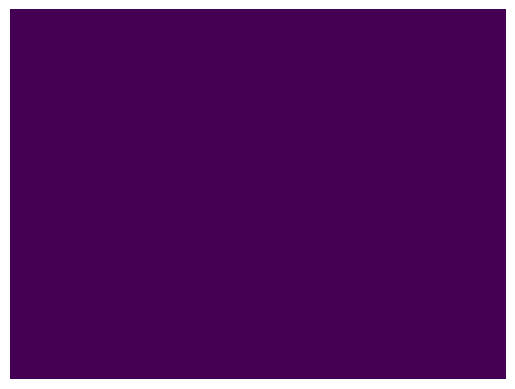

In [247]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',xticklabels=False)
